Neste notebook faremos uma análise exploratória dos dados pré-processados da Wyscout, com foco em preparar os dados para a modelagem no notebook seguinte

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mplsoccer import VerticalPitch

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#other
import aux_functions_plot as p

#ml / stats

import sklearn.metrics as sk_metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler



## Leitura dos dados


In [2]:
shots = pd.read_parquet('./data/shots_dataframe.parquet')

In [3]:
goals = shots[shots["goal"] == 1].copy()

In [4]:
shots.head()

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,league,foot,firstName,lastName,label,venue,date,previous_event,x,y,c,distance,angle,goal,free_kick,counter_attack,rebound,prev_cross,prev_touch,prev_pass,prev_smart_pass,prev_duel
257339,10,Shot,"[{'id': 402}, {'id': 1401}, {'id': 1203}, {'id...",25437,"[{'x': 91, 'y': 29}, {'x': 0, 'y': 0}]",1694390,Shot,4418,1H,31.226217,100,88178649,European_Championship,left,Blaise,Matuidi,"France - Romania, 2 - 1",Stade de France,"June 10, 2016 at 9:00:00 PM GMT+2",Head pass,9.45,19.72,14.28,17.123694,0.242346,0,0,0,0,0,0,1,0,0
257923,10,Shot,"[{'id': 402}, {'id': 201}, {'id': 1216}, {'id'...",83824,"[{'x': 71, 'y': 29}, {'x': 100, 'y': 100}]",1694390,Shot,11944,1H,143.119551,100,88178722,European_Championship,right,Mihai Doru,Pintilii,"France - Romania, 2 - 1",Stade de France,"June 10, 2016 at 9:00:00 PM GMT+2",Simple pass,30.45,19.72,14.28,33.632141,0.196835,0,0,0,0,0,0,1,0,0
258172,10,Shot,"[{'id': 402}, {'id': 201}, {'id': 1201}, {'id'...",33235,"[{'x': 96, 'y': 57}, {'x': 100, 'y': 100}]",1694390,Shot,11944,1H,219.576026,100,88178751,European_Championship,right,Bogdan Sorin,Stancu,"France - Romania, 2 - 1",Stade de France,"June 10, 2016 at 9:00:00 PM GMT+2",Air duel,4.20,38.76,4.76,6.348039,0.851948,0,0,0,0,0,0,0,0,1
257684,10,Shot,"[{'id': 403}, {'id': 201}, {'id': 1215}, {'id'...",6165,"[{'x': 96, 'y': 61}, {'x': 100, 'y': 100}]",1694390,Shot,11944,1H,247.532561,100,88373458,European_Championship,right,Florin,Andone,"France - Romania, 2 - 1",Stade de France,"June 10, 2016 at 9:00:00 PM GMT+2",Air duel,4.20,41.48,7.48,8.578485,0.472204,0,0,0,0,0,0,0,0,1
257303,10,Shot,"[{'id': 401}, {'id': 2101}, {'id': 1802}]",3682,"[{'x': 75, 'y': 33}, {'x': 0, 'y': 0}]",1694390,Shot,4418,1H,557.319065,100,88178811,European_Championship,left,Antoine,Griezmann,"France - Romania, 2 - 1",Stade de France,"June 10, 2016 at 9:00:00 PM GMT+2",Simple pass,26.25,22.44,11.56,28.682679,0.233111,0,0,0,0,0,0,1,0,0


### Checando data types / NaNs

In [5]:
shots.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45284 entries, 257339 to 2988607
Data columns (total 34 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   eventId          45284 non-null  int64  
 1   subEventName     45284 non-null  object 
 2   tags             45284 non-null  object 
 3   playerId         45284 non-null  int64  
 4   positions        45284 non-null  object 
 5   matchId          45284 non-null  int64  
 6   eventName        45284 non-null  object 
 7   teamId           45284 non-null  int64  
 8   matchPeriod      45284 non-null  object 
 9   eventSec         45284 non-null  float64
 10  subEventId       45284 non-null  int64  
 11  id               45284 non-null  int64  
 12  league           45284 non-null  object 
 13  foot             45284 non-null  object 
 14  firstName        45284 non-null  object 
 15  lastName         45284 non-null  object 
 16  label            45284 non-null  object 
 17  venue

In [6]:
shots.isna().mean()

eventId            0.0
subEventName       0.0
tags               0.0
playerId           0.0
positions          0.0
matchId            0.0
eventName          0.0
teamId             0.0
matchPeriod        0.0
eventSec           0.0
subEventId         0.0
id                 0.0
league             0.0
foot               0.0
firstName          0.0
lastName           0.0
label              0.0
venue              0.0
date               0.0
previous_event     0.0
x                  0.0
y                  0.0
c                  0.0
distance           0.0
angle              0.0
goal               0.0
free_kick          0.0
counter_attack     0.0
rebound            0.0
prev_cross         0.0
prev_touch         0.0
prev_pass          0.0
prev_smart_pass    0.0
prev_duel          0.0
dtype: float64

In [7]:
shots.columns

Index(['eventId', 'subEventName', 'tags', 'playerId', 'positions', 'matchId',
       'eventName', 'teamId', 'matchPeriod', 'eventSec', 'subEventId', 'id',
       'league', 'foot', 'firstName', 'lastName', 'label', 'venue', 'date',
       'previous_event', 'x', 'y', 'c', 'distance', 'angle', 'goal',
       'free_kick', 'counter_attack', 'rebound', 'prev_cross', 'prev_touch',
       'prev_pass', 'prev_smart_pass', 'prev_duel'],
      dtype='object')

### Checando o tipo de dados das features

In [8]:
shots.select_dtypes("int").columns


Index(['eventId', 'playerId', 'matchId', 'teamId', 'subEventId', 'id', 'goal',
       'free_kick', 'counter_attack', 'rebound', 'prev_cross', 'prev_touch',
       'prev_pass', 'prev_smart_pass', 'prev_duel'],
      dtype='object')

In [9]:
shots.select_dtypes("float").columns

Index(['eventSec', 'x', 'y', 'c', 'distance', 'angle'], dtype='object')

In [10]:
shots.select_dtypes("object").columns

Index(['subEventName', 'tags', 'positions', 'eventName', 'matchPeriod',
       'league', 'foot', 'firstName', 'lastName', 'label', 'venue', 'date',
       'previous_event'],
      dtype='object')

Todas as colunas do dataframe estão com o data type correto. Além disso, verificamos que não temos ocorrência de NaNs em nenhuma das features

In [11]:
print(f"O dataset contém {shots.shape[1]} features (colunas) e {shots.shape[0]} linhas")

O dataset contém 34 features (colunas) e 45284 linhas


## Análise Univaridada

Das variáveis do tipo 'int' iremos olhar apenas os gols (target). As demais variáveis são ou binárias ou de id.

### Avaliando o target (goals)

In [12]:
shots.groupby('goal').size().sort_values()

goal
1     4629
0    40655
dtype: int64

Text(0.5, 1.0, 'Distribuição do número de gols marcados')

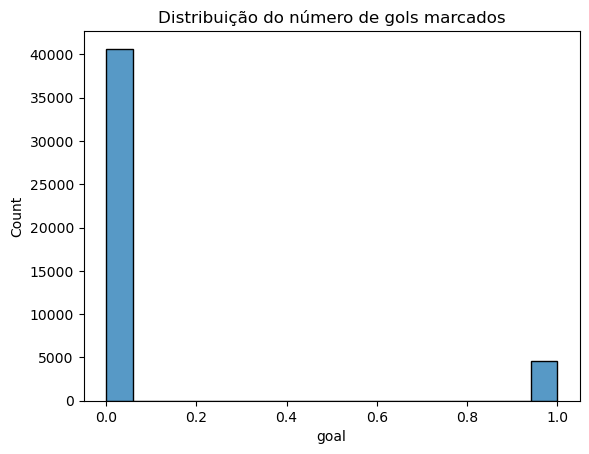

In [14]:
sns.histplot(shots['goal'])
plt.title("Distribuição do número de gols marcados")

### Avaliando as features do tipo object mais relevantes

In [15]:
shots.groupby('subEventName').size().sort_values()

subEventName
Free kick shot     2209
Shot              43075
dtype: int64

In [16]:
shots.groupby('eventName').size().sort_values()

eventName
Free Kick     2209
Shot         43075
dtype: int64

Estas 2 variáveis estão redundantes, e podemos excluir ambas, dado que já temos encoding para free_kick. Além disso, vamos excluir também position pois já extraimos as coordenadas x e y na etapa anterior.

In [17]:
excluir = ['eventName', 'subEventName', 'position', 'match_period']

In [18]:
shots.groupby('previous_event').size().sort_values(ascending = False)

previous_event
Simple pass                10615
Air duel                    5263
Ground attacking duel       4711
Ground defending duel       4553
Cross                       4057
Touch                       3003
Foul                        2099
Clearance                   2059
Smart pass                  1809
Ground loose ball duel      1446
Corner                       989
Head pass                    939
High pass                    915
Acceleration                 777
Reflexes                     526
Free kick cross              484
Shot                         216
Goalkeeper leaving line      162
Free Kick                    150
Save attempt                 131
Throw in                     126
Hand foul                     87
Launch                        60
Free kick shot                32
Protest                       23
Goal kick                     19
Out of game foul              12
Hand pass                      7
Late card foul                 6
Violent Foul                

### Avaliando as features do tipo float

Text(0.5, 1.0, 'Distribuição de chutes ao longo da distância horizontal do campo (x)')

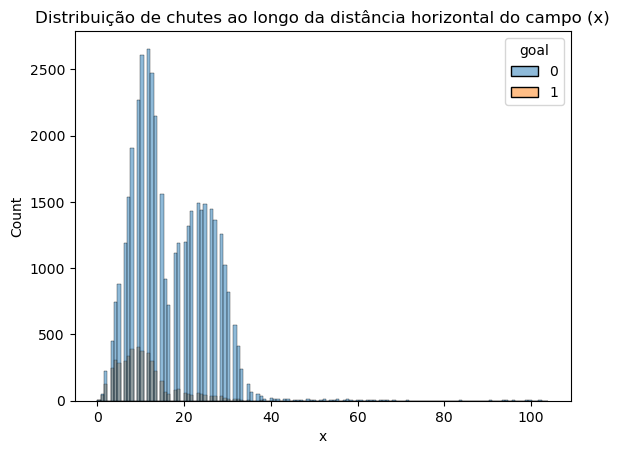

In [26]:
sns.histplot(x = shots['x'], hue = shots['goal'])
plt.title("Distribuição de chutes ao longo da distância horizontal do campo (x)")

Text(0.5, 1.0, 'Distribuição da distribuição de chutes ao longo da distância vertical do campo (y)')

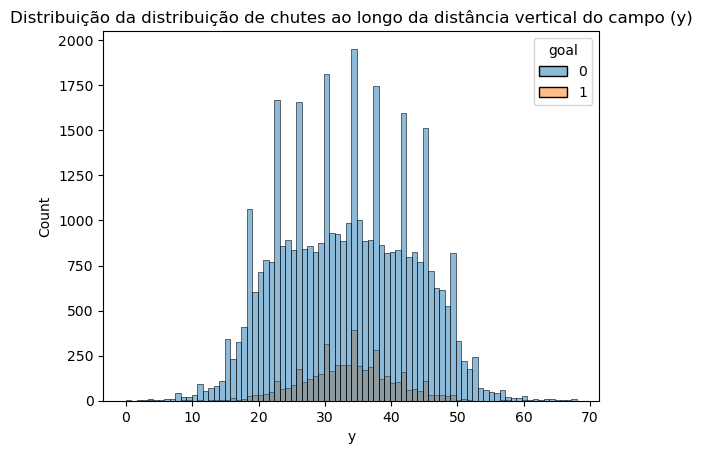

In [23]:
sns.histplot(x = shots['y'], hue = shots['goal'])
plt.title("Distribuição da distribuição de chutes ao longo da distância vertical do campo (y)")

Text(0.5, 1.0, 'Distribuição da quantidade chutes por angulo')

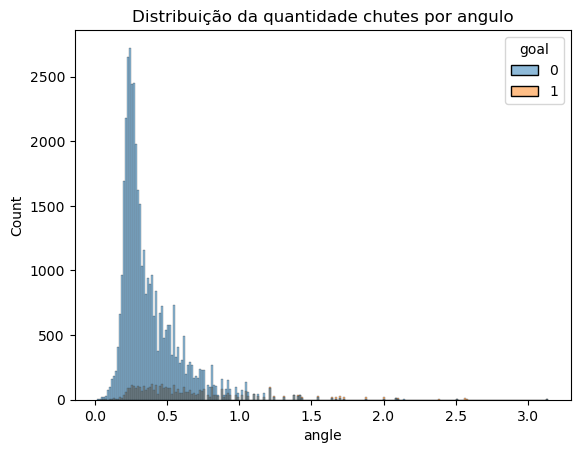

In [24]:
sns.histplot(x = shots['angle'], hue = shots['goal'])
plt.title("Distribuição da quantidade chutes por angulo (radianos)")

Text(0.5, 1.0, 'Distribuição da quantidade chutes pela distancia')

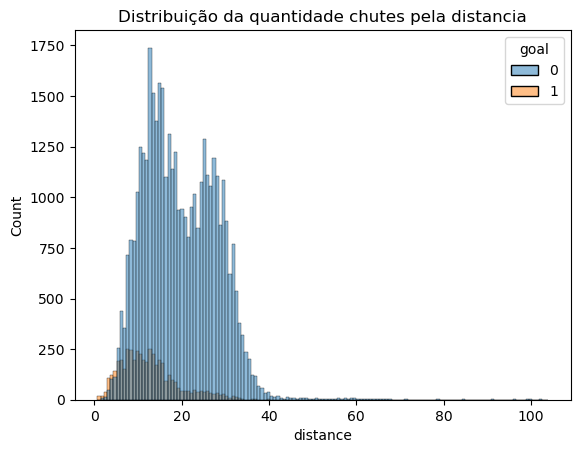

In [25]:
sns.histplot(x = shots['distance'], hue = shots['goal'])
plt.title("Distribuição da quantidade chutes pela distancia")

## Análise multivariada

### Avaliando a posição de onde os chutes partem e hipóteses iniciais

In [27]:
nb_shots, x,y, df_shots = p.prepare_heatmap(shots, 'x', 'y', 24,17, return_df = True)
share_shots = nb_shots / nb_shots.sum() * 100

/Users/lucasmaretti/Documents/repos/football_analytics_master/aux_functions_plot.py:500: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df_img = df_pos.pivot(col_y + "ZoneMean", col_x + "ZoneMean", "aggVal")


In [28]:
share_shots = nb_shots / nb_shots.sum() * 100
# plot the heatmap
dict_info = {"Proporção de chutes (em %)": {"values": share_shots, "display_type": ".2f"},
             "Número de chutes": {"values": nb_shots, "display_type": ".0f"}}
fig = p.create_heatmap(x, y, share_shots, dict_info, title_name="Posição dos chutes")
fig.show()

Podemos observar que a maioria dos chutes parte de dentro da área adversária, o que faz sentido. Vamos plotar agora de onde saíram os chutes que de fato resultaram em gol

In [29]:

# numero de chutes por grid
nb_goals, x, y = p.prepare_heatmap(goals, "x", "y", 24, 17)

goal_proba = np.divide(nb_goals, nb_shots, out=np.zeros_like(nb_goals), where=nb_shots!=0) * 100


# plotando o heatmap
dict_info = {"Probabilidade de marcar (em %)": {"values": goal_proba, "display_type": ".1f"},
             "Fração de chutes (em %)": {"values": share_shots, "display_type": ".2f"},
             "Numero de chutes": {"values": nb_shots, "display_type": ".0f"},
             "Numero de goals": {"values": nb_goals, "display_type": ".0f"}}
fig = p.create_heatmap(x, y, goal_proba, dict_info, title_name="Probabilidade de marcar")
fig.show()

/Users/lucasmaretti/Documents/repos/football_analytics_master/aux_functions_plot.py:500: FutureWarning:

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.



É possível notar que a probabilidade marcar é maior quando se está na área adversária. Curioso notar que parece existir alguns outliers no dataset, que são gols que são marcados de muito longe, incluindo um caso que o chute partiu da área adversária e outro da lateral do campo na altura do círculo central. Vamos olhar mais de perto dentro da área no próximo plot

/var/folders/d2/5n02rp0x0x72ht561l_7rrmh0000gn/T/ipykernel_91614/1474929513.py:8: RuntimeWarning:

invalid value encountered in divide



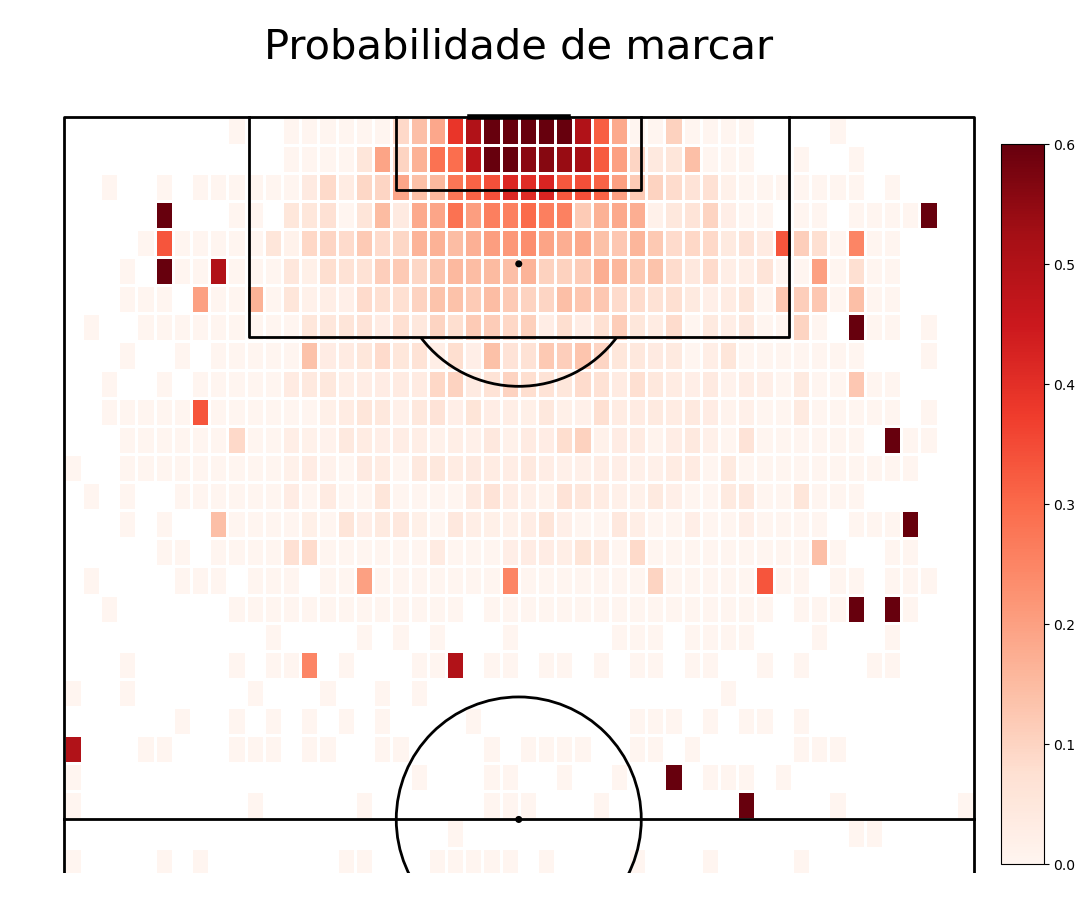

In [30]:
#plot pitch
pitch = VerticalPitch(line_color='black', half = True, pitch_type='custom', pitch_length=105, pitch_width=68, line_zorder = 2)
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
bin_statistic = pitch.bin_statistic(105 - shots['x'], shots['y'], bins = 50)
#normalize number of goals by number of shots
bin_statistic_goals = pitch.bin_statistic(105 - goals['x'], goals['y'], bins=50)
bin_statistic["statistic"] = bin_statistic_goals["statistic"]/bin_statistic["statistic"]
#plot heatmap
pcm = pitch.heatmap(bin_statistic, ax=ax["pitch"], cmap='Reds', edgecolor='white', vmin = 0, vmax = 0.6)
#make legend
ax_cbar = fig.add_axes((0.95, 0.05, 0.04, 0.8))
cbar = plt.colorbar(pcm, cax=ax_cbar)
fig.suptitle('Probabilidade de marcar' , fontsize = 30)
plt.show()

In [64]:
outliers = shots[(shots['x'] > 35) & (shots['y'] < 0) &shots['goal'] == 1]
outliers

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,league,foot,firstName,lastName,label,venue,date,previous_event,x,y,c,distance,angle,goal,free_kick,counter_attack,rebound,prev_cross,prev_touch,prev_pass,prev_smart_pass,prev_duel


Usando os dados das informações da partida como label, venue e date foi possível encontrar alguns destes gols no youtube. E a conclusão foi que parece ter havido erro no registro de dados para estes gols, dados que vários deles ocorreram dentro da área adversária como o de Yussuf Poulsen pelo RB Leipzig e de Pablo Sarabia pelo Girona.

In [54]:
nb_shots, x,y, df_shots = p.prepare_heatmap(outliers, 'x', 'y', 24,17, return_df = True)
share_shots = nb_shots / nb_shots.sum() * 100

# plot the heatmap
dict_info = {"Proporção de chutes (em %)": {"values": share_shots, "display_type": ".2f"},
             "Número de chutes": {"values": nb_shots, "display_type": ".0f"}}
fig = p.create_heatmap(x, y, share_shots, dict_info, title_name="Posição dos chutes outliers")
fig.show()

/Users/lucasmaretti/Documents/repos/football_analytics_master/aux_functions_plot.py:500: FutureWarning:

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.



In [55]:
outliers.shape[0]/goals.shape[0] * 100

0.06480881399870382

Os gols outliers representam uma fração irrisória do total de gols. Mesmo assim iremos filtrá-los usando o fato de que para considerarmos um gol como válido de uma determinada posição, precisa-se ser necessário ter pelo menos 10 chutes desta posição.

In [56]:
### fazer o código para filtrar aqui

rows_to_exclude = outliers.index.tolist()

In [57]:
shots.shape

(45276, 34)

In [58]:
shots.drop(rows_to_exclude, axis = 0, inplace = True)

In [61]:
goals = shots[shots["goal"] == 1]

nb_shots, x,y, df_shots = p.prepare_heatmap(shots, 'x', 'y', 24,17, return_df = True)
share_shots = nb_shots / nb_shots.sum() * 100
# numero de chutes por grid
nb_goals, x, y = p.prepare_heatmap(goals, "x", "y", 24, 17)

goal_proba = np.divide(nb_goals, nb_shots, out=np.zeros_like(nb_goals), where=nb_shots!=0) * 100


# plotando o heatmap
dict_info = {"Probabilidade de marcar (em %)": {"values": goal_proba, "display_type": ".1f"},
             "Fração de chutes (em %)": {"values": share_shots, "display_type": ".2f"},
             "Numero de chutes": {"values": nb_shots, "display_type": ".0f"},
             "Numero de goals": {"values": nb_goals, "display_type": ".0f"}}
fig = p.create_heatmap(x, y, goal_proba, dict_info, title_name="Probabilidade de marcar")
fig.show()

/Users/lucasmaretti/Documents/repos/football_analytics_master/aux_functions_plot.py:500: FutureWarning:

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.

/Users/lucasmaretti/Documents/repos/football_analytics_master/aux_functions_plot.py:500: FutureWarning:

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.



#### Hipótese 1) 

#### Existe alguma relação entre o ângulo do chute e gols?

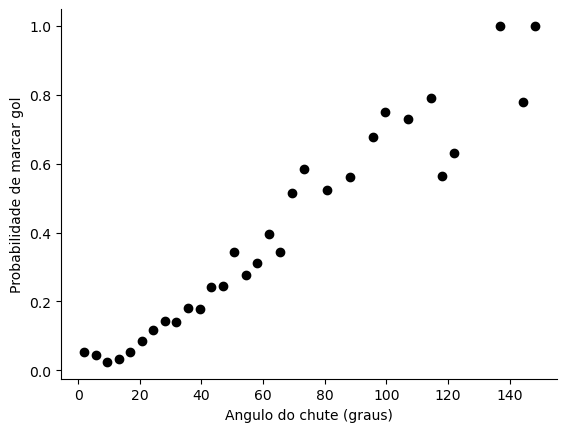

In [59]:
# numero de chutes por angulo
shotcount_dist = np.histogram(shots['angle']*180/np.pi, bins=40, range=[0, 150])
# numero de gols por angulo
goalcount_dist = np.histogram(goals['angle']*180/np.pi, bins=40, range=[0, 150])
np.seterr(divide='ignore', invalid='ignore')
# probabilidade de marcar um gol
prob_goal = np.divide(goalcount_dist[0], shotcount_dist[0])
angle = shotcount_dist[1]
midangle = (angle[:-1] + angle[1:])/2

# plot

fig,ax = plt.subplots()
ax.plot(midangle, prob_goal, linestyle='none', marker= '.', markersize= 12, color='black')
ax.set_ylabel('Probabilidade de marcar gol')
ax.set_xlabel("Angulo do chute (graus)")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

#### Hipótese 2) 

#### Existe alguma relação entre a distância do chute e gols?

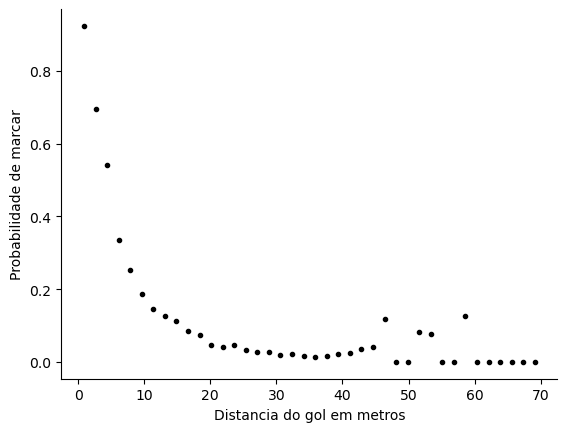

In [50]:
# numero de chutes
shotcount_dist = np.histogram(shots['distance'],bins=40,range=[0, 70])
# numero de gols
goalcount_dist = np.histogram(goals['distance'],bins=40,range=[0, 70])
# probabilidade empirica de marcar
prob_goal = np.divide(goalcount_dist[0],shotcount_dist[0])
distance = shotcount_dist[1]
middistance= (distance[:-1] + distance[1:])/2

#plot
fig, ax = plt.subplots()

ax.plot(middistance, prob_goal, linestyle='none', marker= '.', color='black')

ax.set_ylabel('Probabilidade de marcar')
ax.set_xlabel("Distancia do gol em metros")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

A seguir iremos fitar um modelos de classificação e o ângulo do chute e a distância são 2 features candidatas para nosso modelo baseline

### Avaliando multicolinearidade

In [104]:
features = ['x', 'y', 'c', 'distance', 'angle',
       'free_kick', 'counter_attack', 'rebound', 'prev_cross', 'prev_touch',
       'prev_pass', 'prev_smart_pass', 'prev_duel']

shots[features].corr()

,x,y,c,distance,angle,free_kick,counter_attack,rebound,prev_cross,prev_touch,prev_pass,prev_smart_pass,prev_duel
x,1.000000,-0.013212,0.151525,0.948134,-0.585436,0.229329,-0.024406,-0.071067,-0.280460,0.010398,0.261533,-0.133525,-0.108563
y,-0.013212,1.000000,-0.075691,-0.035344,0.035585,-0.007978,-0.000044,0.006115,0.007436,0.011893,0.007431,0.016084,-0.026111
c,0.151525,-0.075691,1.000000,0.435326,-0.569882,0.119020,0.032093,-0.035199,-0.180021,-0.016409,0.056764,0.028147,0.019089
distance,0.948134,-0.035344,0.435326,1.000000,-0.728649,0.249691,-0.011966,-0.074708,-0.314939,0.005057,0.253821,-0.107169,-0.094918
angle,-0.585436,0.035585,-0.569882,-0.728649,1.000000,-0.154790,-0.038017,0.086507,0.287650,0.007317,-0.182618,0.005569,0.025027
free_kick,0.229329,-0.007978,0.119020,0.249691,-0.154790,1.000000,-0.053584,-0.020883,-0.084426,-0.060328,-0.132622,-0.046184,-0.155606
counter_attack,-0.024406,-0.000044,0.032093,-0.011966,-0.038017,-0.053584,1.000000,-0.013216,-0.037410,-0.034168,0.031688,0.062903,0.016098
rebound,-0.071067,0.006115,-0.035199,-0.074708,0.086507,-0.020883,-0.013216,1.000000,-0.034403,-0.024583,-0.054042,-0.018819,-0.063408
prev_cross,-0.280460,0.007436,-0.180021,-0.314939,0.287650,-0.084426,-0.037410,-0.034403,1.000000,-0.099386,-0.218487,-0.076085,-0.256352
prev_touch,0.010398,0.011893,-0.016409,0.005057,0.007317,-0.060328,-0.034168,-0.024583,-0.099386,1.000000,-0.156123,-0.054367,-0.183180


<AxesSubplot: >

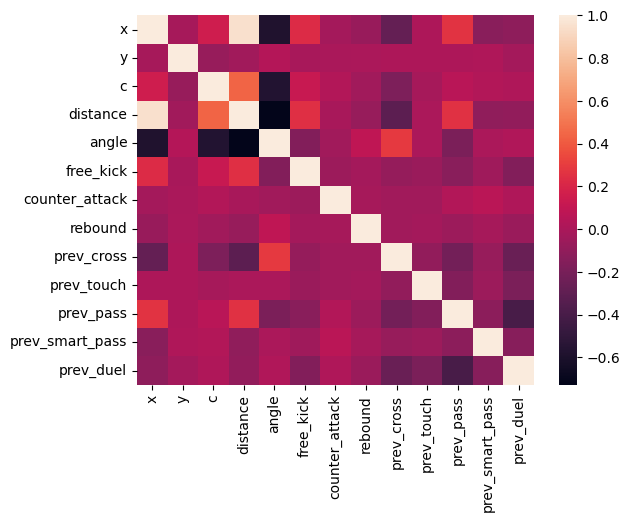

In [107]:
sns.heatmap(shots[features].corr())

Conclusão: nós não iremos considerar as features 'x' e 'distance' juntas no modelo devido à elevada correlação entre elas

## Modelagem

In [113]:
features = ['y', 'c', 'distance', 'angle',
       'free_kick', 'counter_attack', 'rebound', 'prev_cross', 'prev_touch',
       'prev_pass', 'prev_smart_pass', 'prev_duel'] # removemos x da lista de features devido à análise de multicolinearidade feita anteriormente

baseline_features = ['distance', 'angle']

target = ['goal']

In [114]:
X = shots[features]
X_baseline = shots[baseline_features]
y = shots[target]

Separando os dados em treino / teste

In [115]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X_baseline, y, test_size=0.25, random_state=42)

### Modelo baseline - Regressão Logística

In [116]:
scaler = StandardScaler()

In [117]:
X_train_scaled, y_train_scaled = scaler.fit_transform(X_train), scaler.fit_transform(y_train)

In [118]:
lr_baseline = LogisticRegression(random_state=42)
lr_baseline.fit(X_train, np.array(y_train).ravel())

LogisticRegression(random_state=42)

In [119]:
pred_vals_baseline = lr_baseline.predict(X_test)

In [120]:
for i, col in enumerate(X_train.columns):
    print(f"Coeficiente da feature {col}: {lr_allfeatures.coef_[0][i]:.3f}")

Coefficient of distance: -0.090
Coefficient of angle: 1.370


In [121]:
pred_probs = lr_baseline.predict_proba(X_test)[:,1]
print(f"Log loss do modelo: {sk_metrics.log_loss(y_test, pred_probs):.5f}")
print(f"AUC do modelo: {sk_metrics.roc_auc_score(y_test, pred_probs)*100:.2f}%")

Log loss of our model: 0.29031
AUC of our model: 75.13%


### Regressão Logística - Testando todas as features

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train_scaled, y_train_scaled = scaler.fit_transform(X_train), scaler.fit_transform(y_train)

lr_allfeatures = LogisticRegression(random_state=42)
lr_allfeatures.fit(X_train, np.array(y_train).ravel())

LogisticRegression(random_state=42)

In [123]:
lr_allfeatures = LogisticRegression(random_state=42)
lr_allfeatures.fit(X_train, np.array(y_train).ravel())

LogisticRegression(random_state=42)

In [124]:
pred_vals_allfeatures = lr_allfeatures.predict(X_test)

In [127]:
pred_probs = lr_allfeatures.predict_proba(X_test)[:,1]
print(f"Log loss do modelo: {sk_metrics.log_loss(y_test, pred_probs):.5f}")
print(f"AUC do modelo: {sk_metrics.roc_auc_score(y_test, pred_probs)*100:.2f}%")

Log loss do modelo: 0.28558
AUC do modelo: 76.51%


In [128]:
for i, col in enumerate(X_train.columns):
    print(f"Coeficiente da feature {col}: {lr_allfeatures.coef_[0][i]:.3f}")

Coeficiente da feature y: -0.005
Coeficiente da feature c: -0.010
Coeficiente da feature distance: -0.110
Coeficiente da feature angle: 1.204
Coeficiente da feature free_kick: 0.926
Coeficiente da feature counter_attack: 0.606
Coeficiente da feature rebound: 0.402
Coeficiente da feature prev_cross: -0.432
Coeficiente da feature prev_touch: 0.029
Coeficiente da feature prev_pass: -0.004
Coeficiente da feature prev_smart_pass: 0.369
Coeficiente da feature prev_duel: -0.468


In [2]:
# Testar Random Forest